# Dataset

In [1]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Let's load data for classification. We will try to predict patient mortality for kidney cancer patients.

In [2]:
dataset = np.load('dataset.npy')

In [3]:
print(f'Dataset shape: {dataset.shape}')
print(dataset[:10])

Dataset shape: (300, 3)
[[6.49671415 5.8617357  1.        ]
 [6.64768854 7.52302986 1.        ]
 [5.76584663 5.76586304 0.        ]
 [7.57921282 6.76743473 1.        ]
 [5.53052561 6.54256004 0.        ]
 [5.53658231 5.53427025 0.        ]
 [6.24196227 4.08671976 1.        ]
 [4.27508217 5.43771247 0.        ]
 [4.98716888 6.31424733 0.        ]
 [5.09197592 4.5876963  0.        ]]


The first column represents the tumor diameter, the second one represents the kidney diameter, and the last one represents the outcome after 5 years, with 1=death, 0=no death.

Similarly to the first lab, the data for this lab is actually generated as it is easier for now. I promise we will start using "real" data really soon.

**Important:** some of the questions / tasks are deliberately slightly ambiguous. Do not hesitate to ask if you are unsure about something.

**Split the dataset into training, validation and testing sets. You can use the** sklearn.model_selection.train_test_split **function (but you don't have to).**

**Detach the target variable from the input variables.**

In [4]:
X = dataset[:,:2]
y = dataset[:,2]

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.33, random_state=42)

In [7]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(160, 2)
(80, 2)
(60, 2)


In [15]:
from matplotlib.colors import ListedColormap
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

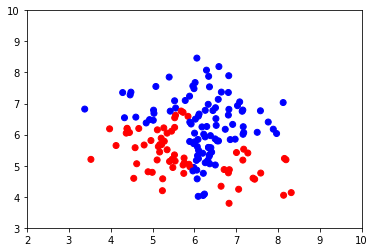

In [16]:
plt.scatter(X_train[:,0],X_train[:,1], c=y_train, cmap=cm_bright)
plt.xlim([2,10])
plt.ylim([3,10])
plt.show()

# Logistic regression

**Train a first linear <ins>classification</ins> model. You don't have to reimplement everything, you can use existing implementations (for example the one from scikit-learn).**

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
logreg = LogisticRegression(C=1e16, solver='lbfgs') # no regularization for now

In [12]:
logreg.fit(X_train, y_train)

LogisticRegression(C=1e+16)

**What is the score?** (by "score", I mean "accuracy" here, i.e. the fraction of correct predictions).

In [13]:
logreg.score(X_test, y_test)

0.7666666666666667

**Now let's add some non-linearity. Hint: the class** sklearn.preprocessing.PolynomialFeatures **may come in handy.**

In [48]:
from sklearn.preprocessing import PolynomialFeatures

In [15]:
poly = PolynomialFeatures(degree=2)

In [16]:
print(X_train.shape)
print(poly.fit_transform(X_train).shape)

(160, 2)
(160, 6)


**What are the hyperparameters here?**

*The degree of the polynomial as well as the 'C' coefficients weighting the regularization in the logistic regression model.*

**What is the classification score with the non linear approach?**

In [17]:
degrees = [1, 2, 3, 4, 5]
Cs = [1e-6, 1e-3, 1, 1e3, 1e6]
for d in degrees:
    poly = PolynomialFeatures(degree=d)
    X_train_poly = poly.fit_transform(X_train)
    X_val_poly = poly.fit_transform(X_val)
    for c in Cs:
        logreg = LogisticRegression(C=c, fit_intercept=False, solver='lbfgs', max_iter=1000)
        logreg.fit(X_train_poly, y_train)
        score = logreg.score(X_val_poly, y_val)
        print('Score with d={} and C={}: {}'.format(d, c, score))

Score with d=1 and C=1e-06: 0.575
Score with d=1 and C=0.001: 0.575
Score with d=1 and C=1: 0.6625
Score with d=1 and C=1000.0: 0.7625
Score with d=1 and C=1000000.0: 0.7625
Score with d=2 and C=1e-06: 0.575
Score with d=2 and C=0.001: 0.6
Score with d=2 and C=1: 0.7625
Score with d=2 and C=1000.0: 0.8
Score with d=2 and C=1000000.0: 0.8
Score with d=3 and C=1e-06: 0.575
Score with d=3 and C=0.001: 0.725
Score with d=3 and C=1: 0.8375
Score with d=3 and C=1000.0: 0.875
Score with d=3 and C=1000000.0: 0.8875
Score with d=4 and C=1e-06: 0.6
Score with d=4 and C=0.001: 0.85
Score with d=4 and C=1: 0.8625


C:\Users\yanni\AppData\Local\Continuum\anaconda2\envs\deep\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Score with d=4 and C=1000.0: 0.9125
Score with d=4 and C=1000000.0: 0.875
Score with d=5 and C=1e-06: 0.775
Score with d=5 and C=0.001: 0.8875


C:\Users\yanni\AppData\Local\Continuum\anaconda2\envs\deep\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\yanni\AppData\Local\Continuum\anaconda2\envs\deep\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    ht

Score with d=5 and C=1: 0.9375
Score with d=5 and C=1000.0: 0.9375
Score with d=5 and C=1000000.0: 0.9375


C:\Users\yanni\AppData\Local\Continuum\anaconda2\envs\deep\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


*Best score seems to be with degree 5 and C=1.*

In [18]:
poly = PolynomialFeatures(degree=5)
X_train_poly = poly.fit_transform(X_train)
logreg = LogisticRegression(C=1, solver='lbfgs', fit_intercept=False)
logreg.fit(X_train_poly, y_train)

C:\Users\yanni\AppData\Local\Continuum\anaconda2\envs\deep\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1, fit_intercept=False)

In [19]:
X_test_poly = poly.fit_transform(X_test)
score = logreg.score(X_test_poly, y_test)
score

0.8833333333333333

*The actual value of the score is not very important here, I could obtain very different scores by simply splitting the dataset into train / val / test with different random states. Updating scikit-learn in my environment also changed the score. Since there are few samples, the estimated score is quite noisy.* 

**Have you been rigorous with the selection of <ins>all</ins> the hyper-parameters? Briefly explain how.**

*Yes, I selected the values of the two hyperparameters using the validation set.*

**What are the accuracies and losses on the training, validation and testing sets? How do you interpret this?**

In [20]:
from sklearn.metrics import log_loss

In [21]:
X_val_poly = poly.fit_transform(X_val)

In [22]:
# Losses
print('Train loss: {}'.format(log_loss(y_train, logreg.predict_proba(X_train_poly))))
print('Val loss: {}'.format(log_loss(y_val, logreg.predict_proba(X_val_poly))))
print('Test loss: {}'.format(log_loss(y_test, logreg.predict_proba(X_test_poly))))

Train loss: 0.2521712271675615
Val loss: 0.27809991534940987
Test loss: 0.28218680523410994


In [23]:
# Losses
print('Train accuracy: {}'.format(logreg.score(X_train_poly, y_train)))
print('Val accuracy: {}'.format(logreg.score(X_val_poly, y_val)))
print('Test accuracy: {}'.format(logreg.score(X_test_poly, y_test)))

Train accuracy: 0.9125
Val accuracy: 0.875
Test accuracy: 0.8833333333333333


*The accuracies and losses are close to each other on the train, val and test sets, so we are not overfitting.*

# Other models

Let's try to make predictions with other models.

## K-Nearest Neighbors

We will first make predictions with a simple KNN.

In [8]:
from sklearn.neighbors import KNeighborsClassifier

We will use one neighbor for now.

In [9]:
knn = KNeighborsClassifier(n_neighbors=1)

In [10]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [11]:
knn.score(X_val, y_val)

0.925

Using the combined power of numpy, scikit-learn and matplotlib, we can get a nice visualization of the decision boundary for our model.

This part is inspired by https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py.

In [17]:
# We create a 2D grid in the same area as the dataset
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, .01), np.arange(y_min, y_max, .01))

In [18]:
# We can make predictions for all points in this area
Z = knn.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

In [19]:
# We define colormaps to have nice colors (default colors are really ugly)
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

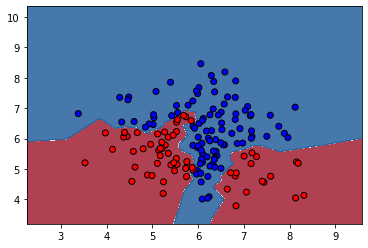

In [20]:
# Now we can plot the decision boundaries for different areas of the feature space along with the training features
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
plt.show()

**Select the best value for the number of neighbors and measure the corresponding final performance.**

*I will use a different approach here, and use k-fold cross validation to select the best hyper-parameter. I thus create a new train / test split.*

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3333, random_state=42)
print(X_train.shape)
print(X_test.shape)

(200, 2)
(100, 2)


In [22]:
from sklearn.model_selection import cross_val_score

In [23]:
for k in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5)
    print('{} neighbors: average k-fold cross validation score is {:.3f}'.format(k, scores.mean()))

1 neighbors: average k-fold cross validation score is 0.930
2 neighbors: average k-fold cross validation score is 0.935
3 neighbors: average k-fold cross validation score is 0.935
4 neighbors: average k-fold cross validation score is 0.940
5 neighbors: average k-fold cross validation score is 0.935
6 neighbors: average k-fold cross validation score is 0.925
7 neighbors: average k-fold cross validation score is 0.930
8 neighbors: average k-fold cross validation score is 0.925
9 neighbors: average k-fold cross validation score is 0.925


*We get slightly better results with k=4*

In [24]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.94

**Plot the corresponding decision boundaries similarly to the figure above. Do you notice any difference?**

In [25]:
Z = knn.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

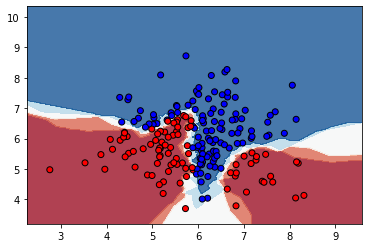

In [26]:
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
plt.show()

*Yes, instead of binary decisions, the model can know estimate "probabilities" from the class ratios of the neighbors, hence the color gradients.*

## Decision tree

**Now do the same thing with a decision tree. What are some possible hyper-parameters? Try different values.**

*In order not to waste too much time, I just show you the result here, without the cross-validation part. Hyper-parameter is mainly the depth of the tree, or somehow alternatively / jointly the min number of samples per leaf.*

In [54]:
from sklearn.tree import DecisionTreeClassifier

In [64]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [65]:
tree.fit(X_train, y_train)
tree.score(X_test, y_test)

0.97

In [68]:
Z = tree.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

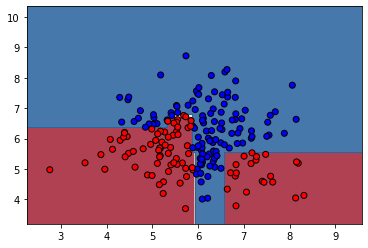

In [69]:
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
plt.show()

*Notice how here the boundaries are vertical and horizontal lines.*

## SVM

Now we will do the same thing with SMVs.

In [28]:
from sklearn.svm import SVC

**Start with a linear SVM. Train the SVM, and show the decision areas.**

*One important thing: C is an important hyper-parameter in the SVM as it is equivalent to how much regularization we apply, with higher values of C corresponding to less regularization. Here, we don't really need regularization, but using high values of C is much slower, so I won't always select the best value so you can quickly run this code if needed, and it does not make that big of a difference anyway. But in general, this is something you should pay attention to.*

In [43]:
svc = SVC(kernel='linear', C=1000, probability=True)

In [44]:
svc.fit(X_train, y_train)

SVC(C=1000, kernel='linear', probability=True)

In [45]:
Z = svc.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

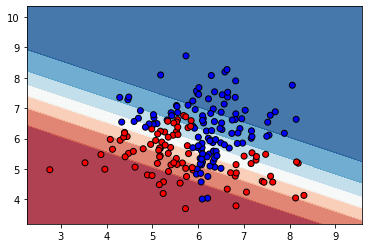

In [46]:
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
plt.show()

**Now train the linear SVM again, this time using the polynomial features. Measure the score and plot the decision areas.**

In [51]:
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)

In [52]:
svc = SVC(kernel='linear', C=1, probability=True)
svc.fit(X_train_poly, y_train)

SVC(C=1, kernel='linear', probability=True)

*Here there is a slight difference: we need to apply polynomial transformation to the 'xx' and 'yy' before we can make predictions with the SVM to obtain the decision areas.*

In [53]:
Z = svc.predict_proba(poly.fit_transform((np.c_[xx.ravel(), yy.ravel()])))[:, 1]
Z = Z.reshape(xx.shape)

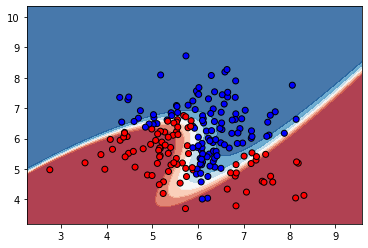

In [54]:
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
plt.show()

In [55]:
svc.score(poly.fit_transform(X_test), y_test)

0.86

Let's go back to the initial (non polynomial) features.

**Train an SVM with a relevant kernel so that the result is equivalent to using the polynomial features. Plot the result. Is it similar?**

In [57]:
svc = SVC(kernel='poly', degree=3, C=10, probability=True)
svc.fit(X_train, y_train)

SVC(C=10, kernel='poly', probability=True)

In [58]:
Z = svc.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

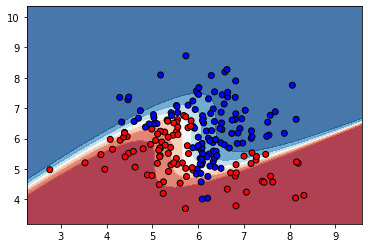

In [59]:
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
plt.show()

*We obtain results similar to the polynomial features, which shouldn't be surprising as using the kernel is supposed to be equivalent to computing the polynomial features. In practice, you can notice there is still a small difference. This is because the polynomial kernel computes the high-degree monoms and binoms, but does not keep the low-degree monoms, while the polynomial features do by default.*

In [60]:
svc.score(X_test, y_test)

0.87

*You can also check that for a given value of C, the kernelized version is much much faster than the version with the explicit polynomial features.*

**Finally, plot the result with an RBF kernel**.

In [63]:
svc = SVC(kernel='rbf', C=1, probability=True)
svc.fit(X_train, y_train)

SVC(C=1, probability=True)

In [64]:
Z = svc.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

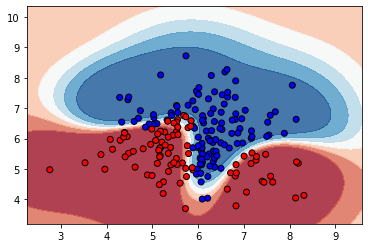

In [65]:
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
plt.show()

In [66]:
svc.score(X_test, y_test)

0.89